In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#import data
train_data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egis_traindata.csv")
train_data=train_data.drop(columns=["Unnamed: 0","green pixels"])


train_data.loc[train_data["Label"]=="Karotte","Label"]=0
train_data.loc[train_data["Label"]=="Kartoffel","Label"]=1
train_data.loc[train_data["Label"]=="Zwiebel","Label"]=2
train_data.loc[train_data["Label"]=="Karotte_Trieb","Label"]=3
train_data.loc[train_data["Label"]=="Kartoffel_Trieb","Label"]=4
train_data.loc[train_data["Label"]=="Zwiebel_Trieb","Label"]=5

train_data["Label"]=train_data["Label"].astype("int")
train_data.head()

X_train=train_data.iloc[:,0:10]
y_train=train_data.iloc[:,10]

In [3]:
#import data
test_data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\TESTDATA_vegis_testdata.csv")


test_data=test_data.drop(columns=["Unnamed: 0","green pixels"])


test_data.loc[test_data["Label"]=="Karotte","Label"]=0
test_data.loc[test_data["Label"]=="Kartoffel","Label"]=1
test_data.loc[test_data["Label"]=="Zwiebel","Label"]=2
test_data.loc[test_data["Label"]=="Karotte_Trieb","Label"]=3
test_data.loc[test_data["Label"]=="Kartoffel_Trieb","Label"]=4
test_data.loc[test_data["Label"]=="Zwiebel_Trieb","Label"]=5

test_data["Label"]=test_data["Label"].astype("int")
test_data.head()

X_test=test_data.iloc[:,0:10]
y_test=test_data.iloc[:,10]

In [4]:
class KNN:

    def __init__(self,n_estimators=1):
        self.n_estimators=n_estimators
        

    def fit(self,X_train,y_train):
        self.X_data=X_train.to_numpy()
        self.y_data=y_train.to_numpy()

    def predict(self,X):
        X=X.to_numpy()
        Klasse=[]
        
        for i in X:
            eu_dist=[]
            for j in self.X_data:
                eu_dist.append(np.linalg.norm(j-i))
            dist=eu_dist.copy()
            dist.sort()
            choices=[]
            for i in range(0,self.n_estimators):
                choice_index=eu_dist.index(dist[i])
                choices.append(self.y_data[choice_index])
            

            Klasse.append(np.bincount(choices).argmax()) #wahrscheinlichste Klasse auslesen und in die Klassen schreiben

        return Klasse 
            
        

In [5]:
knn=KNN(3)
knn.fit(X_train,y_train)
test_pred=knn.predict(X_test)
train_pred=knn.predict(X_train)



In [6]:
#y_test_pred=knn.predict(X_test)
#y_train_pred=knn.predict(X_train)
accuracy_testdata = accuracy_score(y_test, test_pred)
accuracy_traindata = accuracy_score(y_train, train_pred)
#score=knn.score(X_train,y_train)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.7751479289940828
Accuracy Train: 0.9050070191857744


Text(0.5, 1.0, 'Vegis Test  DATA')

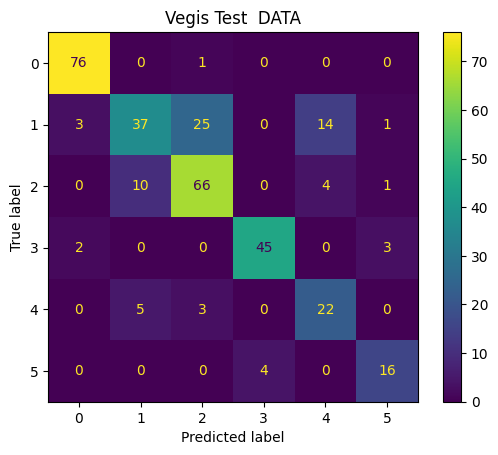

In [7]:
cm = ConfusionMatrixDisplay.from_predictions(
    y_test,
    test_pred,   
)


cm.ax_.set_title("Vegis Test  DATA")

Text(0.5, 1.0, 'Vegis Train  DATA')

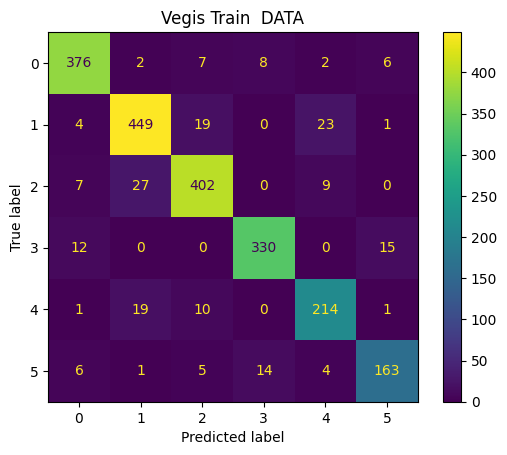

In [8]:
cm = ConfusionMatrixDisplay.from_predictions(
    y_train,
    train_pred,   
)


cm.ax_.set_title("Vegis Train  DATA")